In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def find_nearest(array, value, k=1):
    if (k > len(array)):
        raise Exception("K > |X|")
        
    array = np.asarray(array)
    ret = []
    
    for i in range(k):
        idx = np.abs(array - value).argmin()
        ret.append(array[idx])
        array = np.delete(array, idx, 0)
        
    return ret

In [3]:
X_ = np.linspace(0, 4, 1000)

def predict(xvals=X_, k=1):
    pred = []
    for x in xvals:
        neighbors = find_nearest(X, x, k=k)
        s = 0

        for neighbor_x in neighbors:
            x_ = np.where(np.array(X) == neighbor_x)

            if k == 1:
                for index in x_:
                    s = y[index[0]]
            else:
                for index in x_:
                    s += y[index[0]]
        pred.append(s/k)
    return pred

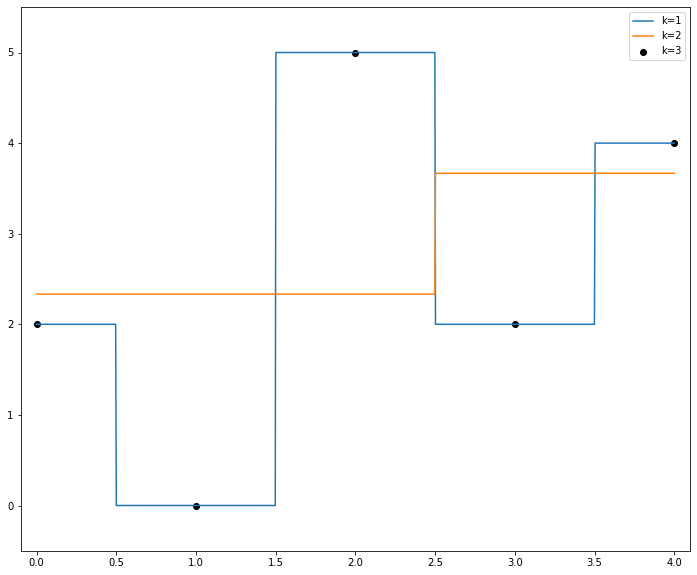

In [4]:
X = [3, 4, 1, 0, 2]
y = [2, 4, 0, 2, 5]

y_pred1 = predict(k=1)
y_pred3 = predict(k=3)

plt.figure(figsize=(12, 10))
plt.scatter(X, y, c='black')
plt.plot(X_, y_pred1)
plt.plot(X_, y_pred3)
plt.axis((-0.1, 4.1, -0.5, 5.5))
plt.legend(['k=1', 'k=2', 'k=3', 'Train Set'])

---
# Use the previous model to predict values for new input

In [5]:
X2 = [0.5001, 1.5001, 2.5001, 3.5001]
y2 = [1, 1, 4, 4]

y2_pred1 = predict(X2, k=1)
y2_pred2 = predict(X2, k=2)
y2_pred3 = predict(X2, k=3)
y2_pred4 = predict(X2, k=4)
y2_pred5 = predict(X2, k=5)

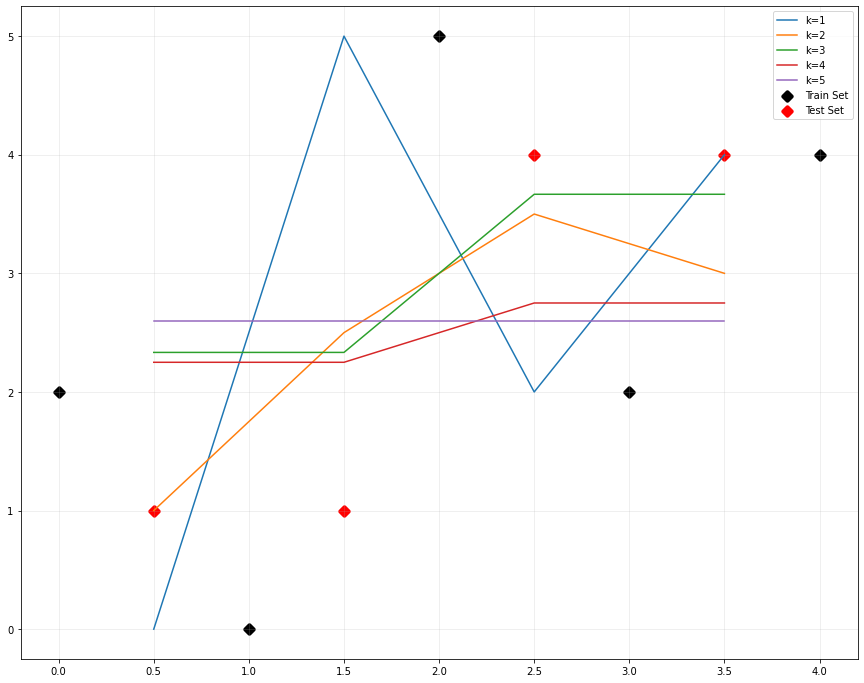

In [20]:
plt.figure(figsize=(15, 12))
plt.scatter(X, y, marker='D', c='black', linewidth=4)
plt.scatter(X2, y2, marker='D', c='red', linewidth=4)
plt.plot(X2, y2_pred1)
plt.plot(X2, y2_pred2)
plt.plot(X2, y2_pred3)
plt.plot(X2, y2_pred4)
plt.plot(X2, y2_pred5)
plt.legend(['k=1', 'k=2', 'k=3', 'k=4', 'k=5', 'Train Set', 'Test Set'])
plt.grid(alpha=0.25)

In [13]:
# r-squared manual calculation
def r_squared(y_, yhat):
    r2 = 0
    ybar = np.sum(y_) / len(y_)
    ssreg = np.sum((y_ - yhat)**2)
    sstot = np.sum((y_ - ybar)**2)
    r2 = 1 - np.divide(ssreg, sstot)
    return r2

print('k=1: ', r_squared(y2, np.array(y2_pred1)))
print('k=2: ', r_squared(y2, np.array(y2_pred2)))
print('k=3: ', r_squared(y2, np.array(y2_pred3)))
print('k=4: ', r_squared(y2, np.array(y2_pred4)))
print('k=5: ', r_squared(y2, np.array(y2_pred5)))
print('lin: ', r_squared(y2, lin_pred))

k=1:  -1.3333333333333335
k=2:  0.6111111111111112
k=3:  0.5802469135802468
k=4:  0.3055555555555556
k=5:  -0.004444444444444473
lin:  -3.817799117511111


---
# Use Scikit's Linear Regression to visually inspect results

In [14]:
from sklearn import linear_model

x_train= np.array(X).reshape(-1, 1)
y_train= np.array(y).reshape(-1, 1)
x_test = np.array(X2).reshape(-1, 1)

linreg = linear_model.LinearRegression()
linreg.fit(x_train, y_train)
lin_pred = linreg.predict(x_test)

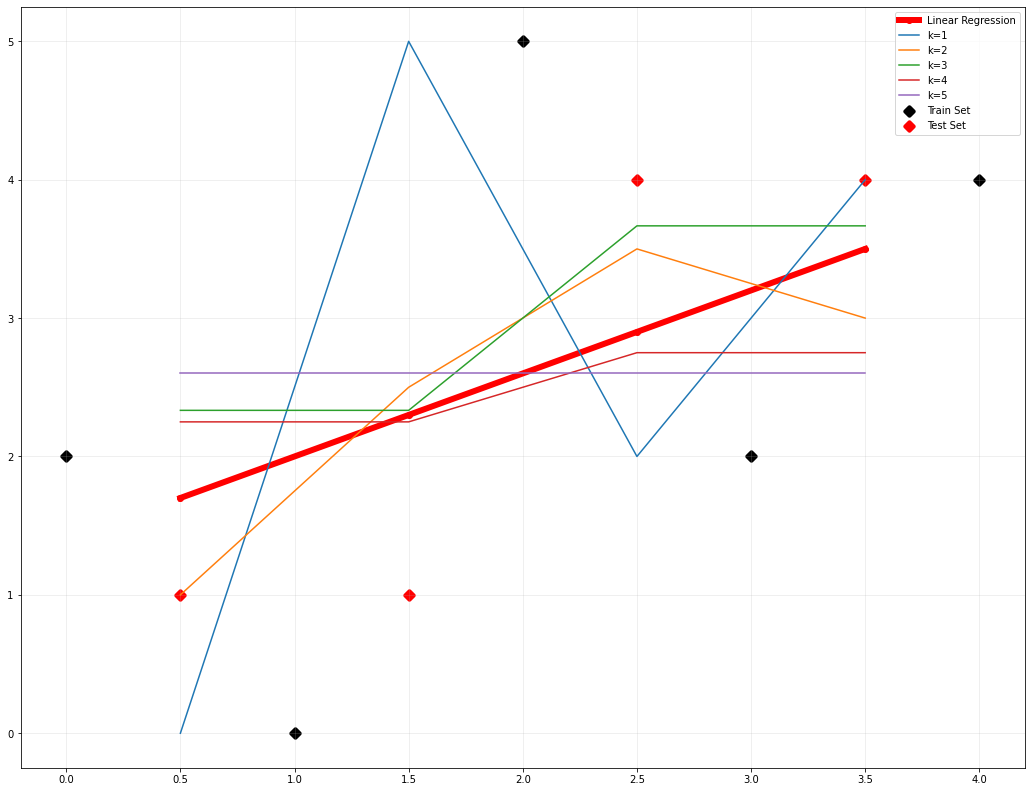

In [19]:
plt.figure(figsize=(18, 14))
plt.scatter(X, y, marker='D', c='black', linewidth=4)
plt.scatter(X2, y2, marker='D', c='red', linewidth=4)
plt.plot(X2, lin_pred, marker='o', c='red', linewidth=6)
plt.plot(X2, y2_pred1)
plt.plot(X2, y2_pred2)
plt.plot(X2, y2_pred3)
plt.plot(X2, y2_pred4)
plt.plot(X2, y2_pred5)
plt.legend(['Linear Regression', 'k=1', 'k=2', 'k=3', 'k=4', 'k=5', 'Train Set', 'Test Set'])
plt.grid(alpha=0.25)

In [16]:
from sklearn.metrics import r2_score
print('k=1:', r2_score(y2, y2_pred1))
print('k=2:', r2_score(y2, y2_pred2))
print('k=3:', r2_score(y2, y2_pred3))
print('k=4:', r2_score(y2, y2_pred4))
print('k=5:', r2_score(y2, y2_pred5))
print('LinReg:', r2_score(y2, lin_pred))

k=1: -1.3333333333333335
k=2: 0.6111111111111112
k=3: 0.5802469135802468
k=4: 0.3055555555555556
k=5: -0.004444444444444473
LinReg: 0.5955502206222223


---
# Using Scikit's KNN to verify

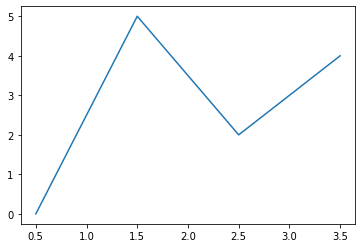

In [45]:
from sklearn.neighbors import KNeighborsRegressor

neigh = KNeighborsRegressor(n_neighbors=1)
neigh.fit(x_train, y_train)

y3_pred1 = neigh.predict(x_test)
plt.plot(X2, y3_pred1)

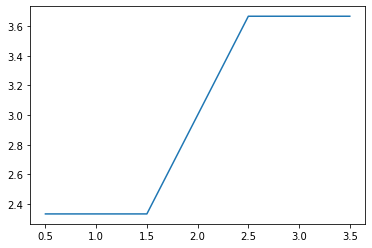

In [46]:
neigh = KNeighborsRegressor(n_neighbors=3)
neigh.fit(x_train, y_train)

y3_pred3 = neigh.predict(x_test)
plt.plot(X2, y3_pred3)

In [48]:
print('k=1:', r2_score(y2, y3_pred1))
print('k=3:', r2_score(y2, y3_pred3))

k=1: -1.3333333333333335
k=3: 0.5802469135802468
